# Preface
---

## Document purpose

This notebook is designed to be a central location for generation of figures utilized in the current working manuscript. Data is presumed to be current and no version control matching checks are made in this document.

## Document Metadata

- Created: 2022-04-18 11:04:00 Eastern
- Last modified: 2022-04-18 11:10:00 Eastern
- Known issues:
  - My life is a walking issue

## Setup

This notebook will be located in an isolated subdirectory of a relevant project directory. Make sure any dataframes are accessible in that directory _and your Google Drive is mounted when working on this notebook!_

## Formatting content

Please stick to the predescribed section content to keep the document organized (I will shame you mercilessly if you do not.) Roughly, the format is as follows:

* Figure identifier ("# Figure [NUMBER]" in a markdown/text notebook cell.)
  * Description of figure ("## Figure description" in a markdown/text notebook cell.)
    * Markdown/text cell describing the figure at a high-level intended for authors, not for publication. Separate cell description allows for reorganizing figure in manuscript and being able to easily change the corresponding labels here.
  * Figure data handling ("## Data handling" in a markdown/text notebook cell.)
    * Code cells to load, format, and preprocess data relevant to *that* particular figure. Use naming conventions for your dataframes that signify what the data is and disallow accidental overlap (e.g. `df = pd.read_csv("data_1.csv")` will be shamed and changed.)
  * Figure plotting ("## Plotting" in a markdown/text notebook cell.)
    * Code cells to take processed data and create manuscript-quality figures. Include high-level journal-specific configurations in a separate configuration cell, e.g. font size or image dimensions (this allows "fine-tuning" and switching to/from double/single column format, for example, to be altering a minimal amount of cells).
  * Figure caption ("## Caption" in a markdown/text notebook cell.)
    * Markdown/text cells to prototype a figure's caption. This is less of a necessity, as version control on large blocks of text in Overleaf is simpler than here.


There are section headings here to make navigation in notebook tools easier - Jupyter lab, VSCode, Google Collab, etc. all allow you to compress markdown headings and jump between them very quickly with a sidebar. _**Do not neglect them, even if they are tedious!**_

On this note, do **not** use any of the Google Collab section organization tools - they are external to embedded notebook structure and may not be present when reading thi notebook in other tools such as VSCode or Jupyter Lab!

## Imports and Universal Properties 

In [62]:
# Scientific calculation
import numpy as np

# Dataframes
import pandas as pd

# Visualization
## Core packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## MPL extras for fine-tuning
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from cycler import cycler

## Pretty printing
from tabulate import tabulate

In [63]:
# Plot configs
## Pyplot RC Params
rc_dict = {
  "savefig.dpi": 600,  # Saved figure dots-per-inch. 600 is "HD"
  "savefig.facecolor": "white",  # This, combined with transparent setting, keeps saved figs from looking like trash on dark backgrounds 
  "savefig.transparent": False,
  "figure.figsize": (10, 8),  # Default (width, height) of figure
  "axes.titlesize" : 28,  # Title size for each (sub)plot
  "axes.labelsize" : 25,  # X and Y axis label sizes (for the label, not the ticks!)
  "lines.linewidth" : 1,  # Plotted line widths (1 is default)
  "lines.markersize" : 7,  # Size of markers on plotted data
  "xtick.labelsize" : 18,  # Size of annotations of X ticks
  "ytick.labelsize" : 18,  # Size of annotations of Y ticks
  "font.size": 18,  # Size of text elements
  "legend.labelspacing": 0.1,  # Vertical spacing of legend entries
  "legend.fontsize": 14,  # Text size of legend entries (smaller so legend boxes don't overlap plot content)
}
plt.rcParams.update(rc_dict)

## Colormaps and markers
markers = ['*','o','s','x','v'] # No linestyle included
viridis = cm.get_cmap('viridis', 5)
colors = viridis(np.linspace(0, 1, 5))

# Network list
networks = ["arxiv", "celegans", "drosophila", "london"]

# arXiv
---

## Data handling

In [64]:
df_accs = pd.read_csv("data/accuracy_networks_concat.csv")

# Select data by parameter value
network = "arxiv"
left = 9  # None if want to consider all lefts
right = [12,13]  # None if want to consider all rights
# Query based on input values
## Restrict to multiplex
df_perf = df_accs.query("Multiplex == @network")
## If left specified, restrict
if type(left) is list:
    df_perf = df_perf.query("LayerLeft.isin(@left)")
elif type(left) is int:
    df_perf =df_perf.query("LayerLeft == @left")

## If right specified, restrict
if type(right) is list:
    df_perf = df_perf.query("LayerRight.isin(@right)")
elif type(right) is int:
    df_perf =df_perf.query("LayerRight == @right")

# ---
df_basicstats = pd.read_csv("results/dataframes/basic_stats.csv")
# Select data by parameter value
layers = [9,12,13]  # None if want to consider all layers
# Query based on input values
## Restrict to multiplex
df_bs = df_basicstats.query("Network == @network")
## If layers specified, restrict
if type(layers) is list:
    df_bs = df_bs.query("Layer.isin(@layers)")
elif type(layers) is int:
    df_bs = df_bs.query("Layer == @layers")


# ---
df_structuralcomparison = pd.read_csv("results/dataframes/layer_structure_comparison.csv")
# Query based on input values
## Restrict to multiplex
df_sc = df_structuralcomparison.query("Network == @network")
## If layers specified, restrict
if type(layers) is list:
    df_sc = df_sc.query("LayerLeft.isin(@layers) & LayerRight.isin(@layers)")
elif type(layers) is int:
    df_sc = df_sc.query("LayerLeft == @layers & LayerRight == @layers")

## Plotting

In [65]:
# Summary stats for each layer
df_basicstats.query("Network == @network")

,Layer,Nodes,Edges,Components,GCC,Degree Heterogeneity,Disconnected Components power-law fit,Network,Modularities
0,1,1594,3019,310,0.080928,1.518385,3.187989,arxiv,0.982390
1,2,5465,14485,508,0.671363,2.505357,3.964531,arxiv,0.860337
2,3,2956,6097,348,0.519959,1.919156,3.983451,arxiv,0.926792
3,4,361,592,83,0.036011,1.232985,10.122177,arxiv,0.979233
4,5,1605,4427,218,0.378816,3.306746,3.195512,arxiv,0.893865
5,6,3506,7341,394,0.604963,2.128181,3.651826,arxiv,0.909610
6,7,1451,2582,259,0.231564,1.822912,3.088868,arxiv,0.960437
7,8,1905,4423,264,0.340157,1.825839,3.158711,arxiv,0.968238
8,9,660,868,177,0.030303,1.428319,4.115962,arxiv,0.983688
9,10,700,1145,179,0.101429,1.550543,5.261081,arxiv,0.968557


<Figure size 720x576 with 0 Axes>

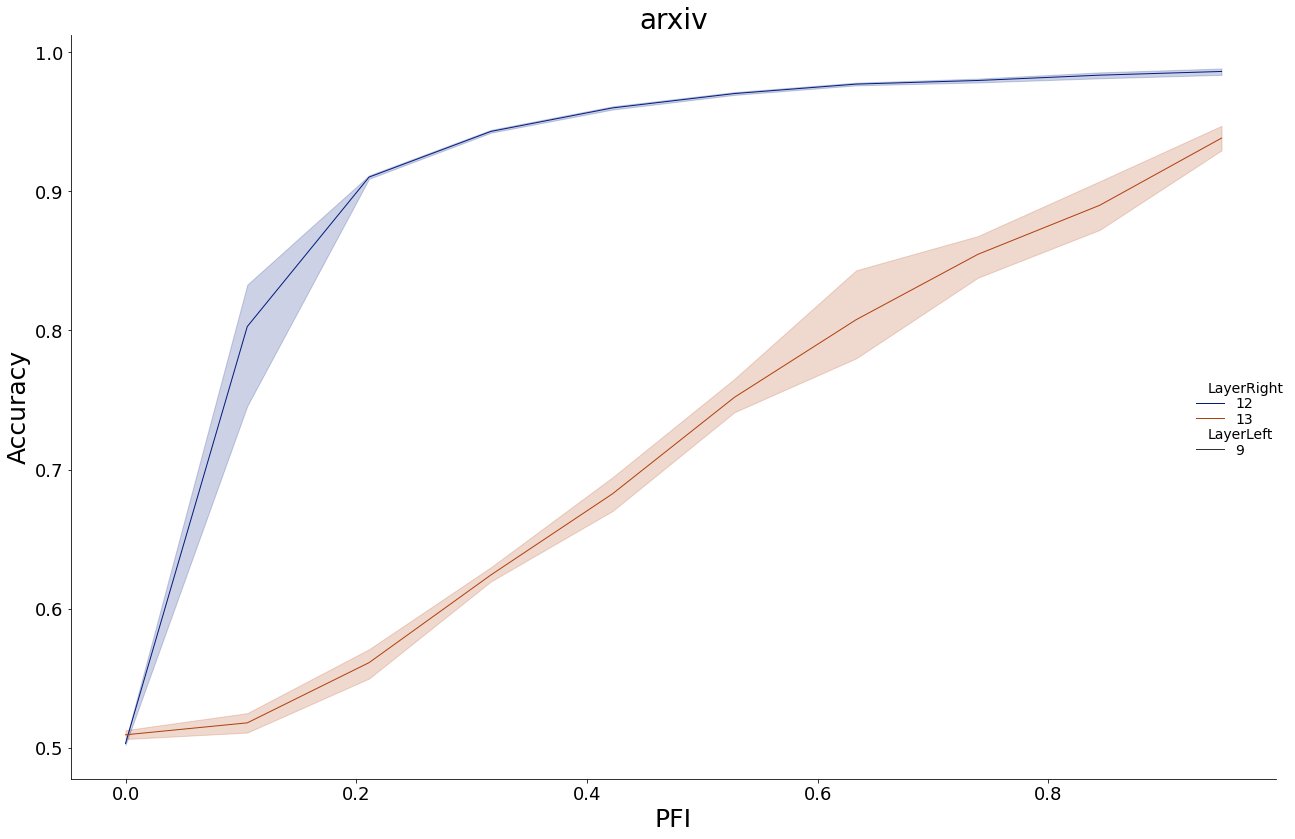

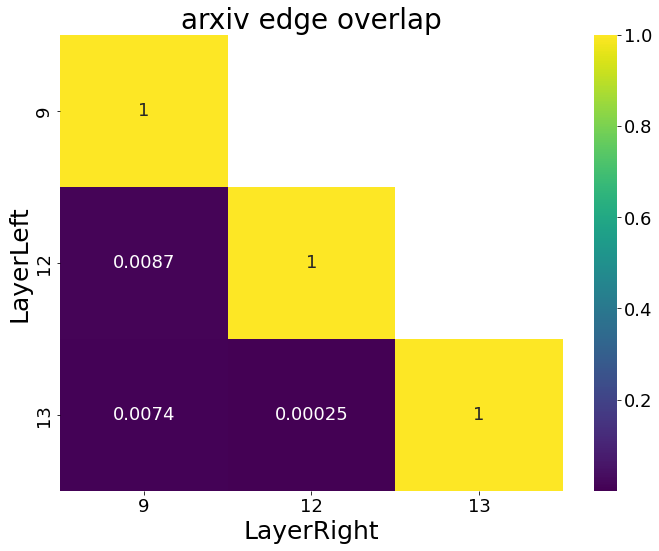

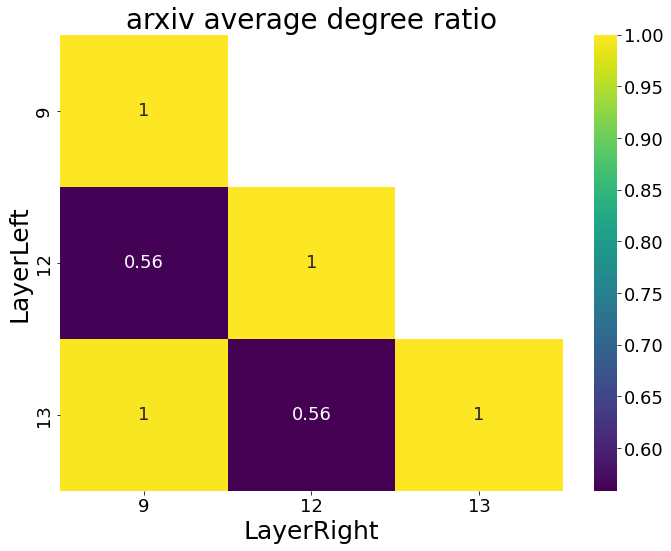

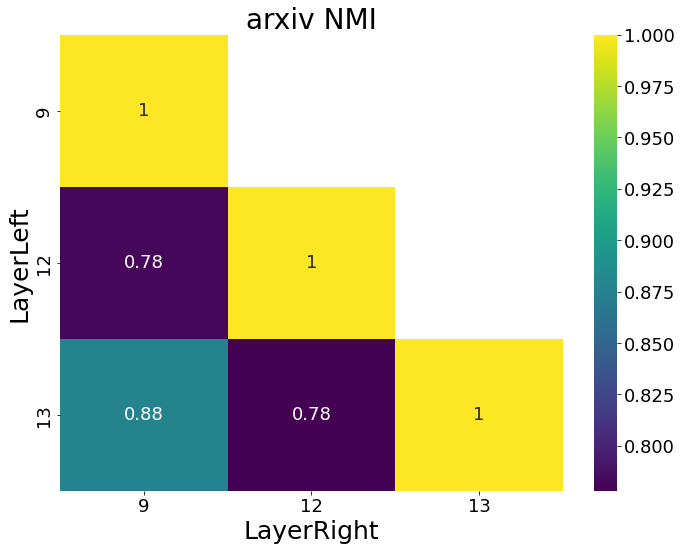

In [66]:
plt.figure()
sns.relplot(data=df_perf, kind="line",
            x="PFI", y="Accuracy",
            style="LayerLeft",
            hue="LayerRight",
            palette="dark",
            height=12, aspect=1.4
    )
plt.title(network)
plt.tight_layout()

heatmap = df_sc.pivot(index="LayerLeft", columns="LayerRight", values="Edge Overlap")
plt.figure()
mask = np.triu(heatmap) - np.identity(len(heatmap))
sns.heatmap(heatmap, cmap="viridis", annot=True, mask=mask)
plt.title(f"{network} edge overlap")
plt.tight_layout()

heatmap = df_sc.pivot(index="LayerLeft", columns="LayerRight", values="Ratio")
plt.figure()
mask = np.triu(heatmap) - np.identity(len(heatmap))
sns.heatmap(heatmap, cmap="viridis", annot=True, mask=mask)
plt.title(f"{network} average degree ratio")
plt.tight_layout()

heatmap = df_sc.pivot(index="LayerLeft", columns="LayerRight", values="NMI")
plt.figure()
mask = np.triu(heatmap) - np.identity(len(heatmap))
sns.heatmap(heatmap, cmap="viridis", annot=True, mask=mask)
plt.title(f"{network} NMI")
plt.tight_layout()

## Observations

Layers 9 and 12 are easily reconstructed and have (relative to layer 9 with 10-13) low NMI and also low ratio of average degrees. Layers 9 and 13 are difficult to reconstruct and have (relatrively) high NMI and also ratio of degrees = 1. What about other dataframe things? Looking at the dataframe basic stats suggests that layer 12 is quite qualitatively different.

# Drosophila
---

## Data handling

In [67]:
df_accs = pd.read_csv("data/accuracy_networks_concat.csv")

# Select data by parameter value
network = "drosophila"
left = [1,2]  # None if want to consider all lefts
right = [2,3,4]  # None if want to consider all rights
# Query based on input values
## Restrict to multiplex
df_perf = df_accs.query("Multiplex == @network")
## If left specified, restrict
if type(left) is list:
    df_perf = df_perf.query("LayerLeft.isin(@left)")
elif type(left) is int:
    df_perf =df_perf.query("LayerLeft == @left")

## If right specified, restrict
if type(right) is list:
    df_perf = df_perf.query("LayerRight.isin(@right)")
elif type(right) is int:
    df_perf =df_perf.query("LayerRight == @right")

# ---
df_basicstats = pd.read_csv("results/dataframes/basic_stats.csv")
# Select data by parameter value
layers = [1,2,3,4]  # None if want to consider all layers
# Query based on input values
## Restrict to multiplex
df_bs = df_basicstats.query("Network == @network")
## If layers specified, restrict
if type(layers) is list:
    df_bs = df_bs.query("Layer.isin(@layers)")
elif type(layers) is int:
    df_bs = df_bs.query("Layer == @layers")


# ---
df_structuralcomparison = pd.read_csv("results/dataframes/layer_structure_comparison.csv")
# Query based on input values
## Restrict to multiplex
df_sc = df_structuralcomparison.query("Network == @network")
## If layers specified, restrict
if type(layers) is list:
    df_sc = df_sc.query("LayerLeft.isin(@layers) & LayerRight.isin(@layers)")
elif type(layers) is int:
    df_sc = df_sc.query("LayerLeft == @layers & LayerRight == @layers")

## Plotting

<Figure size 720x576 with 0 Axes>

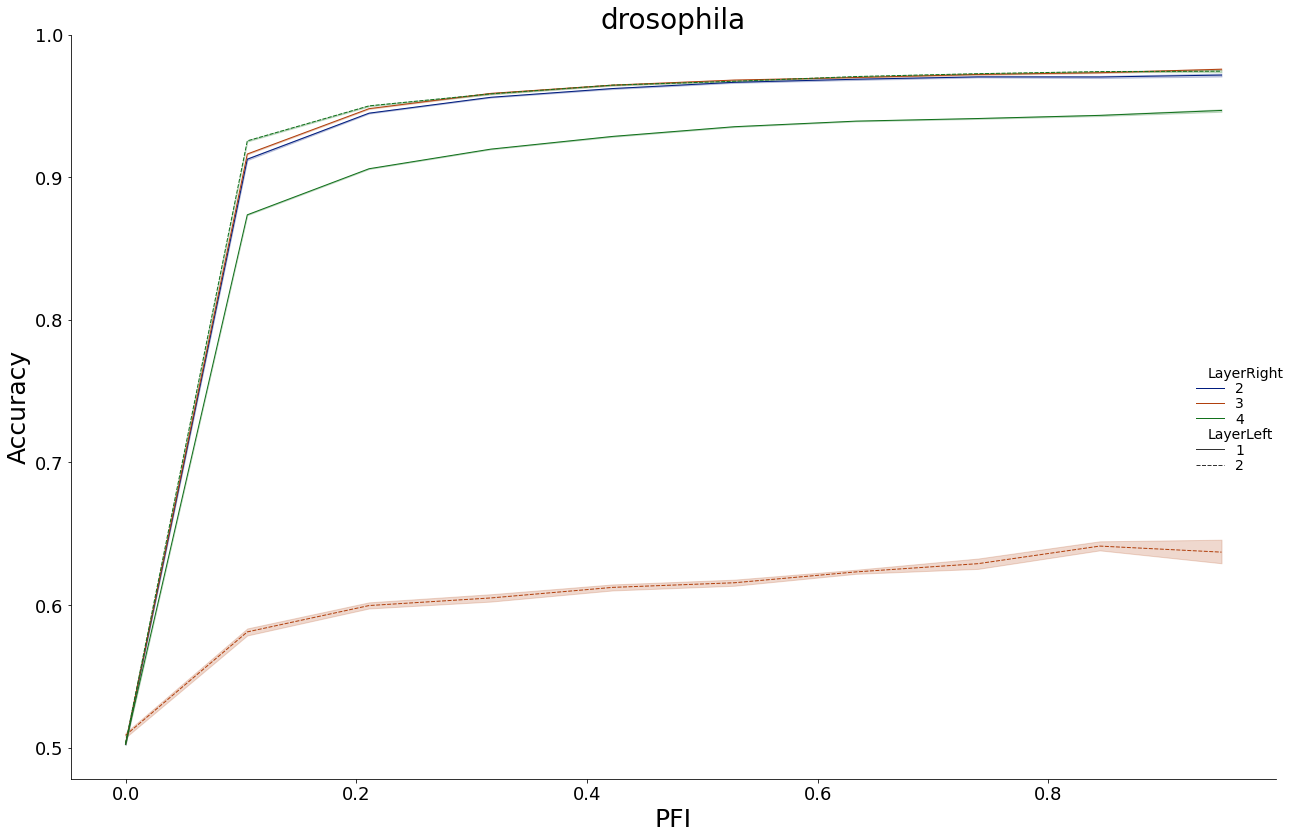

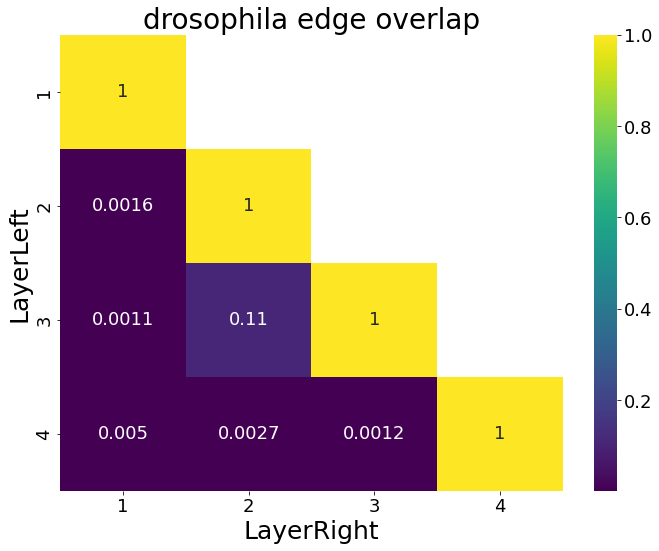

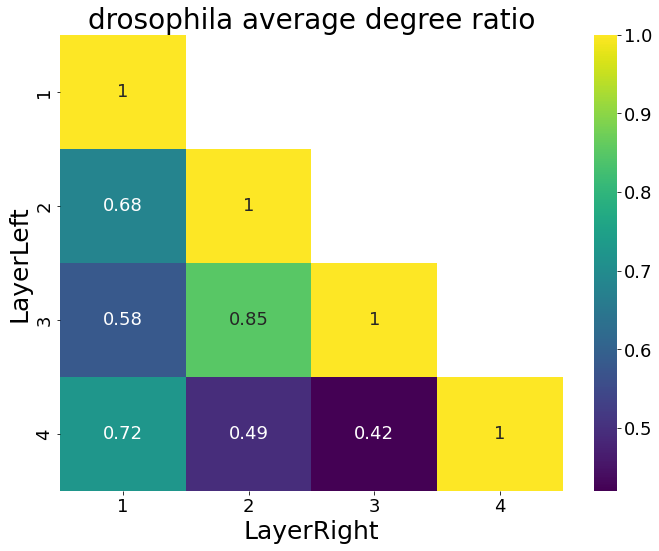

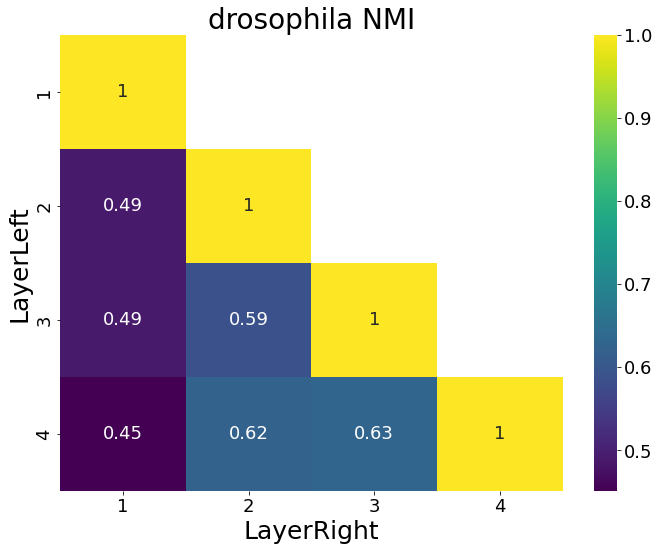

In [68]:
plt.figure()
sns.relplot(data=df_perf, kind="line",
            x="PFI", y="Accuracy",
            style="LayerLeft",
            hue="LayerRight",
            palette="dark",
            height=12, aspect=1.4
    )
plt.title(network)
plt.tight_layout()

heatmap = df_sc.pivot(index="LayerLeft", columns="LayerRight", values="Edge Overlap")
plt.figure()
mask = np.triu(heatmap) - np.identity(len(heatmap))
sns.heatmap(heatmap, cmap="viridis", annot=True, mask=mask)
plt.title(f"{network} edge overlap")
plt.tight_layout()

heatmap = df_sc.pivot(index="LayerLeft", columns="LayerRight", values="Ratio")
plt.figure()
mask = np.triu(heatmap) - np.identity(len(heatmap))
sns.heatmap(heatmap, cmap="viridis", annot=True, mask=mask)
plt.title(f"{network} average degree ratio")
plt.tight_layout()

heatmap = df_sc.pivot(index="LayerLeft", columns="LayerRight", values="NMI")
plt.figure()
mask = np.triu(heatmap) - np.identity(len(heatmap))
sns.heatmap(heatmap, cmap="viridis", annot=True, mask=mask)
plt.title(f"{network} NMI")
plt.tight_layout()

## Observation

Layers 1 and 4 of 'drosophila' appear to have low NMI (low community correlation), a large number of overlapping nodes, and reconstruct well (quickly and high accuracy.)

Layers 2 and 3 have high NMI (0.97!) and low performance, a good signal we expect, however, layers 2 and 4 also have high NMI and good performance. This is likely because there is significantly lower node overlap with layers 2 and 4 than with 2 and 3 (0.12 versus 0.54) and correspondingly low edge overlap as well (0.0027 versus 0.11)

# Celegans
---

## Data handling

In [69]:
df_accs = pd.read_csv("data/accuracy_networks_concat.csv")

# Select data by parameter value
network = "celegans"
left = [1,2]  # None if want to consider all lefts
right = [2,3]  # None if want to consider all rights
# Query based on input values
## Restrict to multiplex
df_perf = df_accs.query("Multiplex == @network")
## If left specified, restrict
if type(left) is list:
    df_perf = df_perf.query("LayerLeft.isin(@left)")
elif type(left) is int:
    df_perf =df_perf.query("LayerLeft == @left")

## If right specified, restrict
if type(right) is list:
    df_perf = df_perf.query("LayerRight.isin(@right)")
elif type(right) is int:
    df_perf =df_perf.query("LayerRight == @right")

# ---
df_basicstats = pd.read_csv("results/dataframes/basic_stats.csv")
# Select data by parameter value
layers = [1,2,3]  # None if want to consider all layers
# Query based on input values
## Restrict to multiplex
df_bs = df_basicstats.query("Network == @network")
## If layers specified, restrict
if type(layers) is list:
    df_bs = df_bs.query("Layer.isin(@layers)")
elif type(layers) is int:
    df_bs = df_bs.query("Layer == @layers")


# ---
df_structuralcomparison = pd.read_csv("results/dataframes/layer_structure_comparison.csv")
# Query based on input values
## Restrict to multiplex
df_sc = df_structuralcomparison.query("Network == @network")
## If layers specified, restrict
if type(layers) is list:
    df_sc = df_sc.query("LayerLeft.isin(@layers) & LayerRight.isin(@layers)")
elif type(layers) is int:
    df_sc = df_sc.query("LayerLeft == @layers & LayerRight == @layers")

## Plotting

<Figure size 720x576 with 0 Axes>

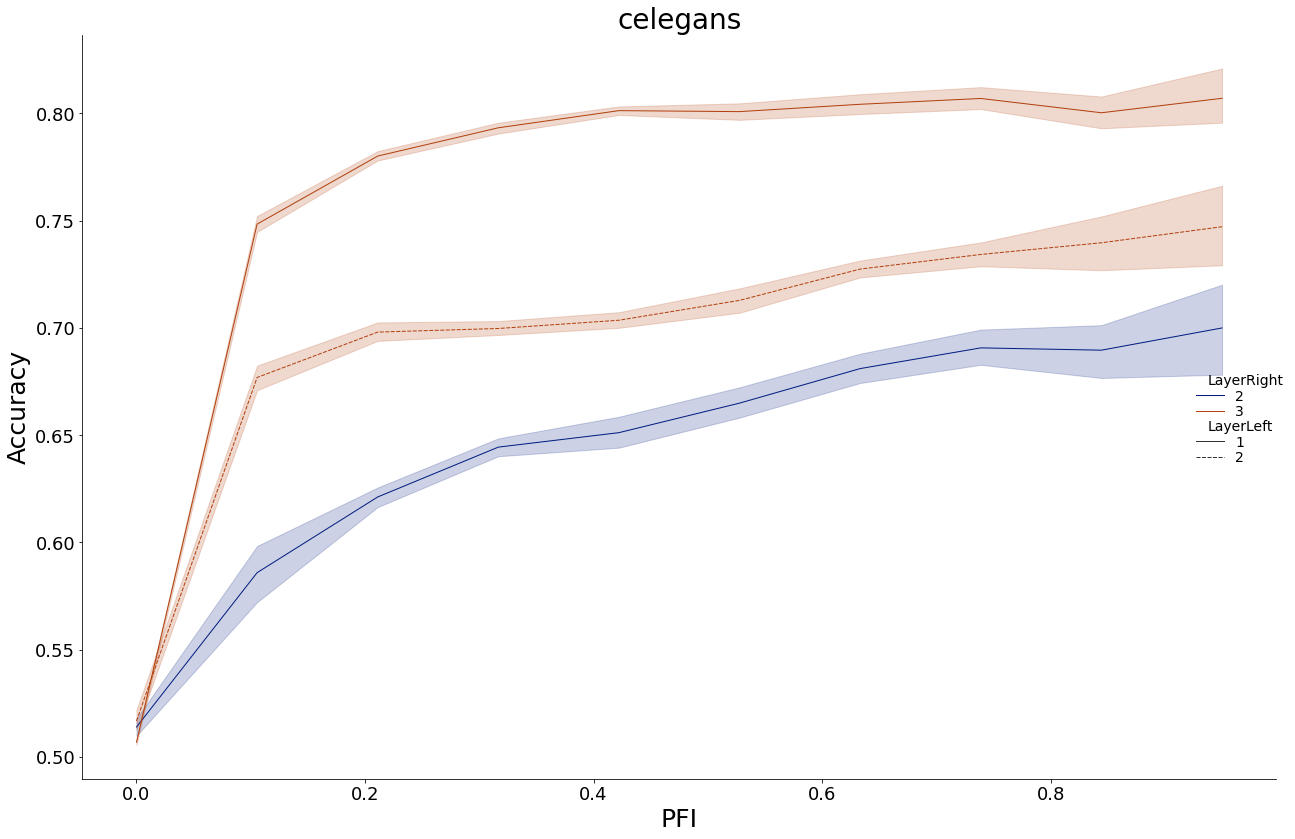

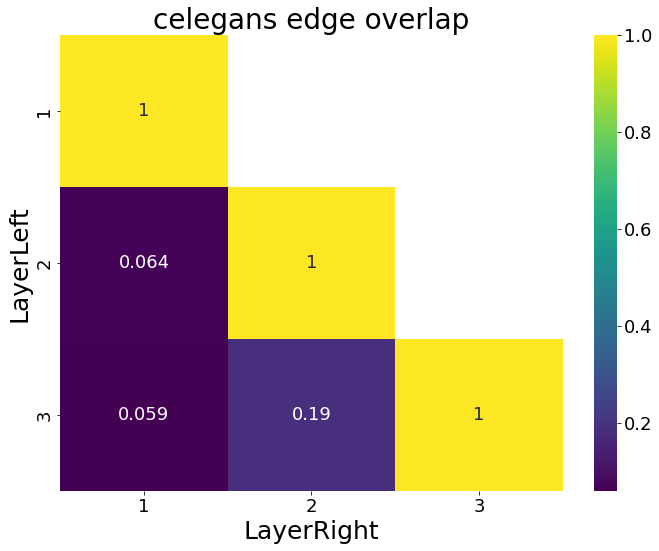

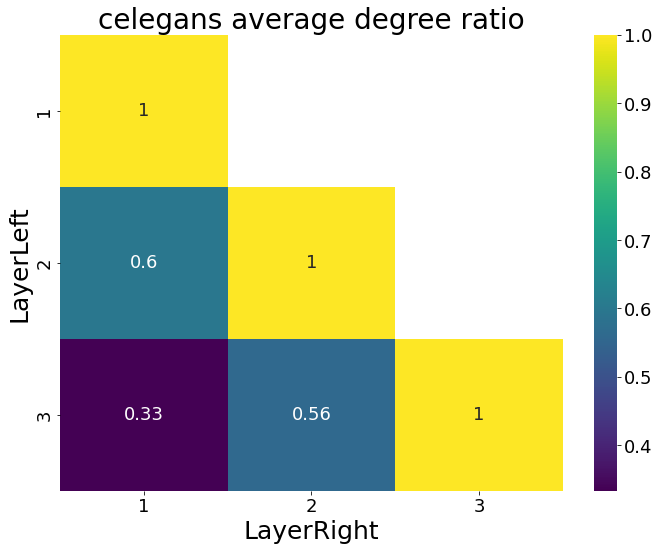

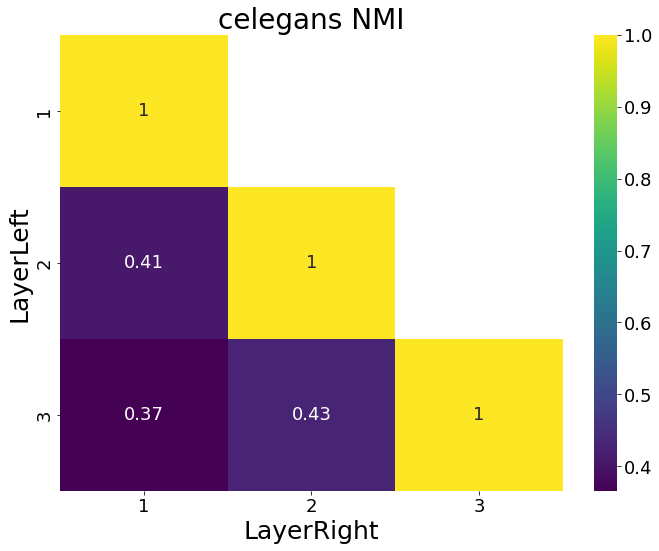

In [70]:
plt.figure()
sns.relplot(data=df_perf, kind="line",
            x="PFI", y="Accuracy",
            style="LayerLeft",
            hue="LayerRight",
            palette="dark",
            height=12, aspect=1.4
    )
plt.title(network)
plt.tight_layout()

heatmap = df_sc.pivot(index="LayerLeft", columns="LayerRight", values="Edge Overlap")
plt.figure()
mask = np.triu(heatmap) - np.identity(len(heatmap))
sns.heatmap(heatmap, cmap="viridis", annot=True, mask=mask)
plt.title(f"{network} edge overlap")
plt.tight_layout()

heatmap = df_sc.pivot(index="LayerLeft", columns="LayerRight", values="Ratio")
plt.figure()
mask = np.triu(heatmap) - np.identity(len(heatmap))
sns.heatmap(heatmap, cmap="viridis", annot=True, mask=mask)
plt.title(f"{network} average degree ratio")
plt.tight_layout()

heatmap = df_sc.pivot(index="LayerLeft", columns="LayerRight", values="NMI")
plt.figure()
mask = np.triu(heatmap) - np.identity(len(heatmap))
sns.heatmap(heatmap, cmap="viridis", annot=True, mask=mask)
plt.title(f"{network} NMI")
plt.tight_layout()

## Observation

This appears to break the desired pattern indicated by community correlations. It has been intimiately explored in Wu et al., however, and they find pretty decent performance. There may be (probably are?) signals Wu et al. can detect that we cannot. I guess its multiplex entropy - we don't get as sophisticated a picture, though the core of ratios and overlap are there?

# London
---

## Data handling

In [71]:
df_accs = pd.read_csv("data/accuracy_networks_concat.csv")

# Select data by parameter value
network = "london"
left = 2  # None if want to consider all lefts
right = 3  # None if want to consider all rights
# Query based on input values
## Restrict to multiplex
df_perf = df_accs.query("Multiplex == @network")
## If left specified, restrict
if type(left) is list:
    df_perf = df_perf.query("LayerLeft.isin(@left)")
elif type(left) is int:
    df_perf =df_perf.query("LayerLeft == @left")

## If right specified, restrict
if type(right) is list:
    df_perf = df_perf.query("LayerRight.isin(@right)")
elif type(right) is int:
    df_perf =df_perf.query("LayerRight == @right")

# ---
df_basicstats = pd.read_csv("results/dataframes/basic_stats.csv")
# Select data by parameter value
layers = [2,3]  # None if want to consider all layers
# Query based on input values
## Restrict to multiplex
df_bs = df_basicstats.query("Network == @network")
## If layers specified, restrict
if type(layers) is list:
    df_bs = df_bs.query("Layer.isin(@layers)")
elif type(layers) is int:
    df_bs = df_bs.query("Layer == @layers")


# ---
df_structuralcomparison = pd.read_csv("results/dataframes/layer_structure_comparison.csv")
# Query based on input values
## Restrict to multiplex
df_sc = df_structuralcomparison.query("Network == @network")
## If layers specified, restrict
if type(layers) is list:
    df_sc = df_sc.query("LayerLeft.isin(@layers) & LayerRight.isin(@layers)")
elif type(layers) is int:
    df_sc = df_sc.query("LayerLeft == @layers & LayerRight == @layers")

## Plotting

<Figure size 720x576 with 0 Axes>

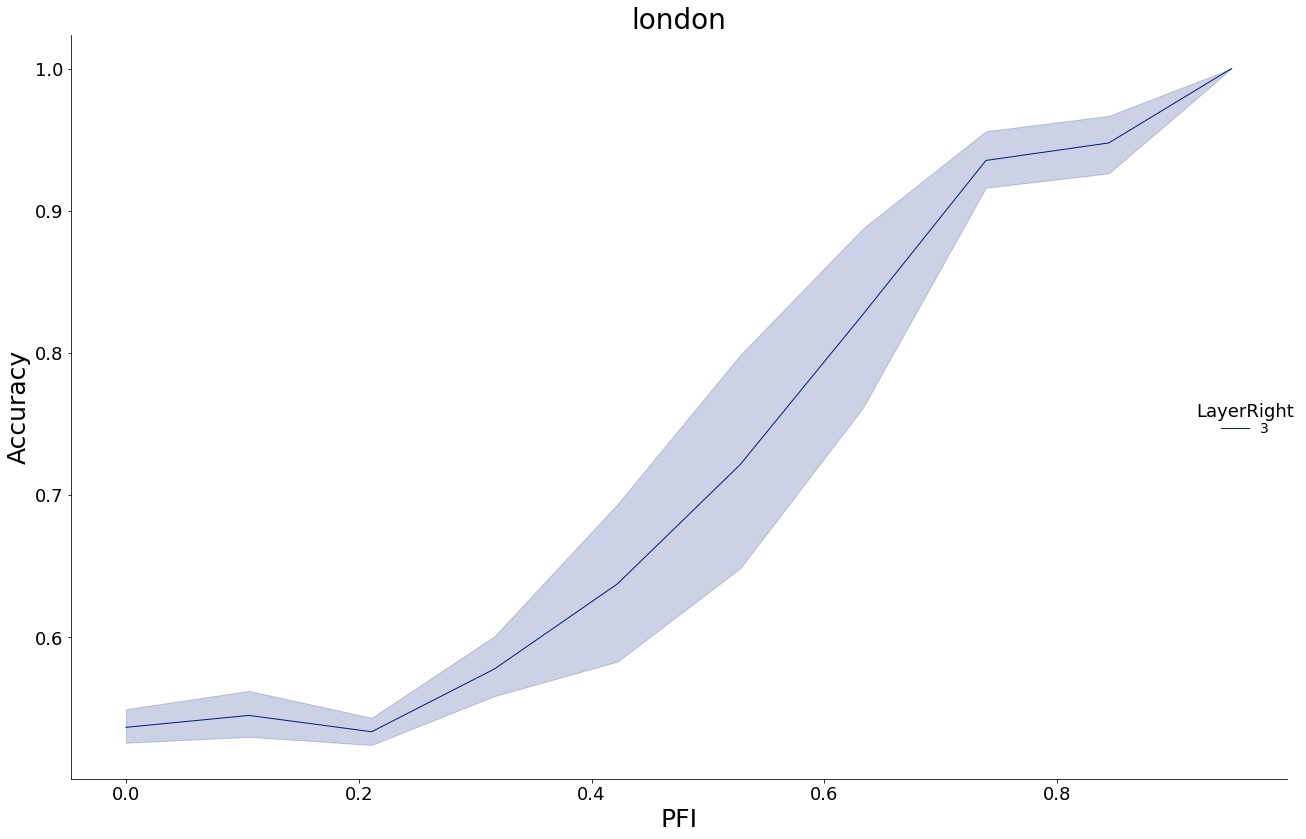

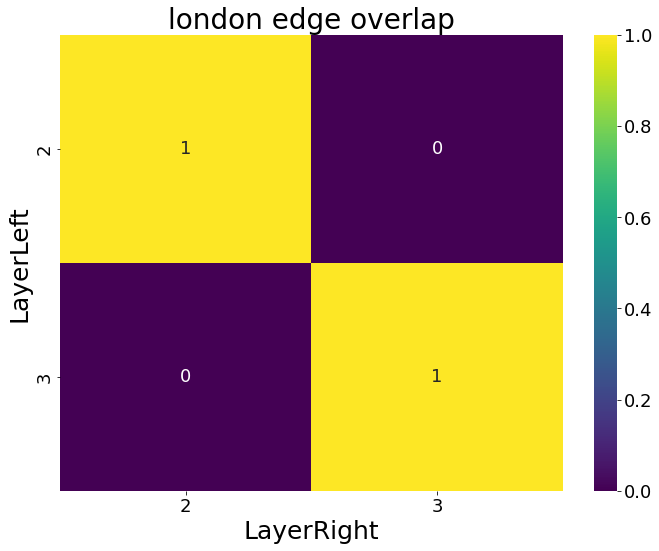

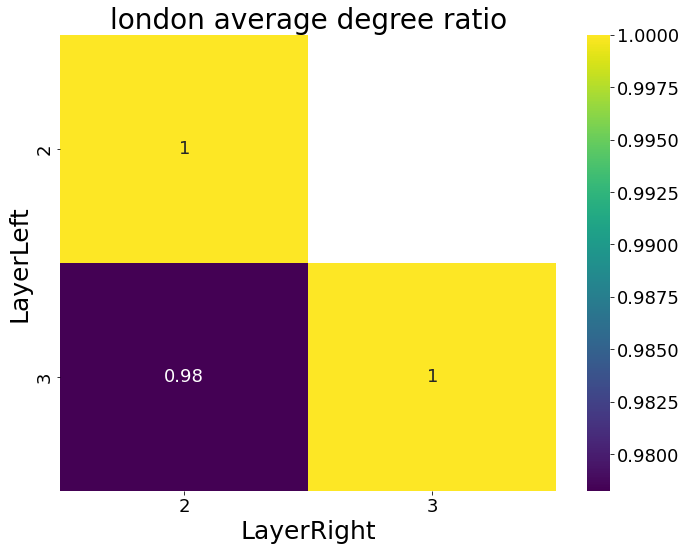

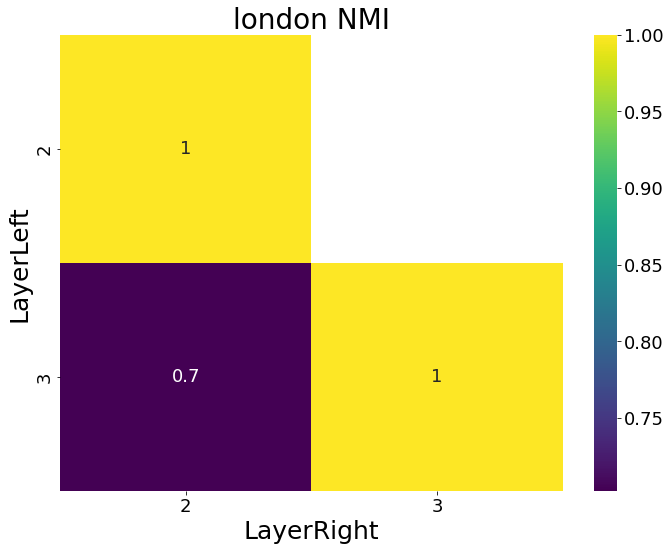

In [72]:
plt.figure()
sns.relplot(data=df_perf, kind="line",
            x="PFI", y="Accuracy",
            col="LayerLeft",
            hue="LayerRight",
            palette="dark",
            height=12, aspect=1.4
    )
plt.title(network)
plt.tight_layout()

heatmap = df_sc.pivot(index="LayerLeft", columns="LayerRight", values="Edge Overlap")
plt.figure()
mask = np.triu(heatmap) - np.identity(len(heatmap))
sns.heatmap(heatmap, cmap="viridis", annot=True, mask=mask)
plt.title(f"{network} edge overlap")
plt.tight_layout()

heatmap = df_sc.pivot(index="LayerLeft", columns="LayerRight", values="Ratio")
plt.figure()
mask = np.triu(heatmap) - np.identity(len(heatmap))
sns.heatmap(heatmap, cmap="viridis", annot=True, mask=mask)
plt.title(f"{network} average degree ratio")
plt.tight_layout()

heatmap = df_sc.pivot(index="LayerLeft", columns="LayerRight", values="NMI")
plt.figure()
mask = np.triu(heatmap) - np.identity(len(heatmap))
sns.heatmap(heatmap, cmap="viridis", annot=True, mask=mask)
plt.title(f"{network} NMI")
plt.tight_layout()

## Observation

Very atypical network structure. Told to ignore for now.

# Table for manuscript

In [73]:
# Format latex table
## Load summary statistics
df_basicstats = pd.read_csv("results/dataframes/basic_stats.csv")
df_basicstats = df_basicstats.sort_values(by=["Network", "Layer"])

## Restrict to relevant columns and rename
df_pp = \
    df_basicstats[["Network", "Layer", "Nodes", "Edges"]].rename(
        columns=\
            {
                "Network": "Dataset",
                "Nodes": "N",
                "Edges": "E",
            }
    )

## Remove redundant information
### Get dataset names without repetition
ntwks = sorted(set(df_pp["Dataset"]))
new_dataset_column = []

### Add the name once and empty cells for the rest
for ntwk in ntwks:
    new_dataset_column.append(ntwk)
    for _ in range(len(df_pp.query("Dataset == @ntwk"))-1):
        new_dataset_column.append(" ")
df_pp["Dataset"] = new_dataset_column

## Print table to copy and paste
# * NOTE: Not complete, will still need to fill in layer names and format a little. Also, add to table environment (tabular inside of table, latex is weird)
print(tabulate(df_pp, tablefmt="latex", headers="keys", showindex=False))

\begin{tabular}{lrrr}
\hline
 Dataset    &   Layer &    N &     E \\
\hline
 arxiv      &       1 & 1594 &  3019 \\
            &       2 & 5465 & 14485 \\
            &       3 & 2956 &  6097 \\
            &       4 &  361 &   592 \\
            &       5 & 1605 &  4427 \\
            &       6 & 3506 &  7341 \\
            &       7 & 1451 &  2582 \\
            &       8 & 1905 &  4423 \\
            &       9 &  660 &   868 \\
            &      10 &  700 &  1145 \\
            &      11 & 1270 &  1953 \\
            &      12 & 4946 & 11600 \\
            &      13 &  377 &   494 \\
 celegans   &       1 &  253 &   517 \\
            &       2 &  260 &   888 \\
            &       3 &  278 &  1703 \\
 drosophila &       1 & 7356 & 23977 \\
            &       2 &  839 &  1864 \\
            &       3 &  755 &  1425 \\
            &       4 & 2851 & 12818 \\
            &       5 &   85 &    71 \\
            &       6 &   72 &    66 \\
            &       7 &   12 &     7 \\
 lon